<a href="https://colab.research.google.com/github/gdmeyerp/Analisis_de_bases_de_Datos/blob/main/AnalisisBD_Tarea_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cree o tome de internet una tabla de datos que tenga por lo menos 10 registros y 5 atributes.

A. Diseñe 10 tipos de consulta para su tabla. En por lo menos tres de ellos debe usar cálculo Lambda.


In [ ]:
import pandas as pd

data = {'Nombre':['Juan','Maria','Pedro','Laura','Carlos','Miguel','Ana','Jorge','Daniela','Sofia','Camila'],
        'Edad':[25,32,30,28,33,27,29,31,35,34,23],
        'Ciudad':['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Manizales','Ibague','Neiva','Pasto','Bogota'],
        'Profesion':['Ingeniero','Medico','Abogado','Enfermera','Contador','Informatico','Administrador','Economista','Psicologo','Diseñador','Informatico'],
        'Salario':[1800000,2500000,2000000,1600000,2100000,1900000,1700000,2200000,2700000,2000000,3000000]}

df = pd.DataFrame(data)

In [ ]:
#1. Filtrar por ciudad específica
df[df['Ciudad']=='Bogota']

,Nombre,Edad,Ciudad,Profesion,Salario
0,Juan,25,Bogota,Ingeniero,1800000
10,Camila,23,Bogota,Informatico,3000000


In [ ]:
#2. Ordenar por salario de mayor a menor
df.sort_values('Salario', ascending=False)

,Nombre,Edad,Ciudad,Profesion,Salario,Nuevo_salario
10,Camila,23,Bogota,Informatico,3000000,3300000.0
8,Daniela,35,Neiva,Psicologo,2700000,2970000.0
1,Maria,32,Medellin,Medico,2500000,2750000.0
7,Jorge,31,Ibague,Economista,2200000,2420000.0
4,Carlos,33,Cartagena,Contador,2100000,2310000.0
2,Pedro,30,Cali,Abogado,2000000,2200000.0
9,Sofia,34,Pasto,Diseñador,2000000,2200000.0
5,Miguel,27,Bucaramanga,Informatico,1900000,2090000.0
0,Juan,25,Bogota,Ingeniero,1800000,1980000.0
6,Ana,29,Manizales,Administrador,1700000,1870000.0


In [ ]:
#3. Agrupar por profesión y obtener promedio de salarios
df.groupby('Profesion').agg({'Salario':'mean'})

,Salario
Profesion,
Abogado,2000000.0
Administrador,1700000.0
Contador,2100000.0
Diseñador,2000000.0
Economista,2200000.0
Enfermera,1600000.0
Informatico,2450000.0
Ingeniero,1800000.0
Medico,2500000.0


In [ ]:
#4. Contar registros por ciudad
df['Ciudad'].value_counts()

Bogota          2
Medellin        1
Cali            1
Barranquilla    1
Cartagena       1
Bucaramanga     1
Manizales       1
Ibague          1
Neiva           1
Pasto           1
Name: Ciudad, dtype: int64

In [ ]:
#5. Obtener las 3 ciudades con mayor salario promedio
df.groupby('Ciudad')['Salario'].mean().sort_values(ascending=False).head(3)

Ciudad
Neiva       2700000.0
Medellin    2500000.0
Bogota      2400000.0
Name: Salario, dtype: float64

In [ ]:
#6. Crear nueva columna indicando si el salario es mayor al promedio
df['Salario_alto'] = df['Salario'] > df['Salario'].mean()

In [ ]:
#7. Filtrar mayores de 30 años (con lambda)
df.loc[lambda df: df['Salario'] < 2500000 ]

,Nombre,Edad,Ciudad,Profesion,Salario,Nuevo_salario
0,Juan,25,Bogota,Ingeniero,1800000,1980000.0
2,Pedro,30,Cali,Abogado,2000000,2200000.0
3,Laura,28,Barranquilla,Enfermera,1600000,1760000.0
4,Carlos,33,Cartagena,Contador,2100000,2310000.0
5,Miguel,27,Bucaramanga,Informatico,1900000,2090000.0
6,Ana,29,Manizales,Administrador,1700000,1870000.0
7,Jorge,31,Ibague,Economista,2200000,2420000.0
9,Sofia,34,Pasto,Diseñador,2000000,2200000.0


In [ ]:
#8. Aumentar salario un 10% (con lambda)
df['Nuevo_salario'] = df['Salario'].apply(lambda x: x*1.1)
df['Nueva_edad'] = df['Edad'].apply(lambda x: x+1)

In [ ]:
#9. Calcular profesionales mayores de 20 años  y vivan en bogota (con lambda)
df.loc[lambda df: (df['Edad'] > 20) & (df['Ciudad'] == 'Bogota')]

,Nombre,Edad,Ciudad,Profesion,Salario,Nuevo_salario,Nueva_edad
0,Juan,25,Bogota,Ingeniero,1800000,1980000.0,26
10,Camila,23,Bogota,Informatico,3000000,3300000.0,24


In [ ]:
#10. Pivot table de promedio salarios por ciudad y profesión
df.pivot_table(values='Salario', index='Ciudad', columns='Profesion', aggfunc='mean')

Profesion,Abogado,Administrador,Contador,Diseñador,Economista,Enfermera,Informatico,Ingeniero,Medico,Psicologo
Ciudad,,,,,,,,,,
Barranquilla,NaN,NaN,NaN,NaN,NaN,1600000.0,NaN,NaN,NaN,NaN
Bogota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800000.0,NaN,NaN
Bucaramanga,NaN,NaN,NaN,NaN,NaN,NaN,1900000.0,NaN,NaN,NaN
Cali,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cartagena,NaN,NaN,2100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ibague,NaN,NaN,NaN,NaN,2200000.0,NaN,NaN,NaN,NaN,NaN
Manizales,NaN,1700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medellin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500000.0,NaN
Neiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700000.0


B. Presente 10 comandos nuevos de tipos Panda, distintos a los usados en clase. Describa cuál es el fin de cada uno de ellos y ejemplifique su uso.


In [ ]:
import pandas as pd
# Creamos una variable para almacenar la dirección url desde donde extraeremos los datos
poblacion = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n'
#Creamos un marco de datos para almacenar la lista de datos de la pagina Web conectada
dframes = pd.read_html(poblacion)
df=dframes[0]
df.head(4)

,N.º,País (o territorio dependiente),Proyección exponencial de la población al 1/7/2023[7]​,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,"Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional",Fecha de esta última cifra de población en particular (d/mm/aaaa)[10]​,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
0,1,China[12]​,1 414 782 000,1785,043,6 104 000,692,161,1 411 750 000,31/12/2022,E,www.stats.gov.cn
1,2,India,1 396 559 000,1762,091,12 741 000,1445,76,1 415 060 000,23/08/2023,R,www.indiastat.com
2,3,Estados Unidos,334 687 000,422,042,1 407 000,160,165,335 289 000,23/08/2023,R,www.census.gov
3,4,Indonesia,279 154 000,352,111,3 086 000,350,63,271 350 000,12/2020,E,www.bps.go.id


In [ ]:
df = df.rename(columns={'País (o territorio dependiente)':'Pais'})
df = df.rename(columns={'Proyección exponencial de la población al 1/7/2023[7]​':'ProyecciónPoblación'})
df = df.rename(columns={'Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional':'Censomasreciente'})
df = df.rename(columns={'Fecha de esta última cifra de población en particular (d/mm/aaaa)[10]​':'UltimaPoblación'})
df

,N.º,Pais,ProyecciónPoblación,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,Censomasreciente,UltimaPoblación,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
0,1,China[12]​,1 414 782 000,1785,043,6 104 000,692,161,1 411 750 000,31/12/2022,E,www.stats.gov.cn
1,2,India,1 396 559 000,1762,091,12 741 000,1445,76,1 415 060 000,23/08/2023,R,www.indiastat.com
2,3,Estados Unidos,334 687 000,422,042,1 407 000,160,165,335 289 000,23/08/2023,R,www.census.gov
3,4,Indonesia,279 154 000,352,111,3 086 000,350,63,271 350 000,12/2020,E,www.bps.go.id
4,5,Pakistán,232 690 000,294,182,4 241 000,481,38,220 425 254,2020,E,www.pbs.gov.pk
...,...,...,...,...,...,...,...,...,...,...,...,...
241,242,Islas Cocos (Australia),600,000,174,0,000,40,593,11/08/2021,C,www.citypopulation.de
242,243,Islas Ultramarinas Menores de los Estados Unidos,100,000,-496,0,000,-,190,1/04/2010,C,www.statoids.com
243,244,Islas Pitcairn (RU),50,000,-041,0,000,-,47,1/07/2021,E,www.visitpitcairn.pn
244,NaN,Mundo,7 926 125 000,10000,110,88 151 000,10000,63,8 055 621 000,23/08/2023,R,www.worldometers.info


In [ ]:
dfnew_data = df[['Pais','ProyecciónPoblación','Censomasreciente','UltimaPoblación',]]
dfnew_data

,Pais,ProyecciónPoblación,Censomasreciente,UltimaPoblación
0,China[12]​,1 414 782 000,1 411 750 000,31/12/2022
1,India,1 396 559 000,1 415 060 000,23/08/2023
2,Estados Unidos,334 687 000,335 289 000,23/08/2023
3,Indonesia,279 154 000,271 350 000,12/2020
4,Pakistán,232 690 000,220 425 254,2020
...,...,...,...,...
241,Islas Cocos (Australia),600,593,11/08/2021
242,Islas Ultramarinas Menores de los Estados Unidos,100,190,1/04/2010
243,Islas Pitcairn (RU),50,47,1/07/2021
244,Mundo,7 926 125 000,8 055 621 000,23/08/2023


1. pd.DataFrame.sort_values(): Ordena el DataFrame según los valores de una columna.



In [ ]:
sorted_df = df.sort_values('Cambio medio anual (%)[8]​', ascending=True)
sorted_df

,N.º,Pais,ProyecciónPoblación,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,Censomasreciente,UltimaPoblación,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
151,152,Kosovo[28]​,1 773 000,002,-003,-1 000,-,-,1 773 971,2022,E,ask.rks-gov.net
231,232,San Pedro y Miquelón (Francia),6 000,000,-004,0,000,-,6 092,1/01/2020,E,www.insee.fr
131,132,Georgia[26]​,3 686 000,005,-007,-3 000,-,-,3 688 647,2022,E,database.geostat.ge
199,200,Tonga,100 000,000,-008,0,000,-,100 179,28/10/2022,C,tongastats.gov.to
206,207,Bermudas (RU),64 000,000,-008,0,000,-,63 982,1/07/2023,A,www.gov.bm
...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,Omán,5 077 000,006,494,251 000,028,14,5 046 061,16/05/2023,D,www.ncsi.gov.om
169,170,Maldivas,660 000,001,582,38 000,004,12,557 426,2020,E,statisticsmaldives.gov.mv
233,234,Islas Malvinas (RU)[31]​,5 000,000,650,0,000,11,3 398,9/10/2016,C,www.fig.gov.fk
152,153,Guinea Ecuatorial,1 715 000,002,673,115 000,013,11,1 715 000,1/07/2023,O,population.un.org


2. pd.DataFrame.groupby(): Agrupa los datos por una columna y permite realizar operaciones en grupos.



In [ ]:
cumulative_population = df['Tipo[11]​'].cumsum()
cumulative_population

0                                                      E
1                                                     ER
2                                                    ERR
3                                                   ERRE
4                                                  ERREE
                             ...                        
241    ERREEEFFECMERARERETEEMPEMOACEETPAEAMRMRTOEAEEC...
242    ERREEEFFECMERARERETEEMPEMOACEETPAEAMRMRTOEAEEC...
243    ERREEEFFECMERARERETEEMPEMOACEETPAEAMRMRTOEAEEC...
244    ERREEEFFECMERARERETEEMPEMOACEETPAEAMRMRTOEAEEC...
245    ERREEEFFECMERARERETEEMPEMOACEETPAEAMRMRTOEAEEC...
Name: Tipo[11]​, Length: 246, dtype: object

3. pd.DataFrame.mode(): Calcula la moda (valor más frecuente) en el DataFrame.


In [ ]:
mode_df = df.mode()
mode_df

,N.º,Pais,ProyecciónPoblación,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,Censomasreciente,UltimaPoblación,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
0,1,Afganistán,11 000,000,091,0,000,-,100 179,1/07/2023,E,www.citypopulation.de
1,10,Albania,2 000,NaN,NaN,NaN,NaN,NaN,101 935 800,NaN,NaN,NaN
2,100,Alemania,NaN,NaN,NaN,NaN,NaN,NaN,103 267,NaN,NaN,NaN
3,101,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,105 166 458,NaN,NaN,NaN
4,102,Angola,NaN,NaN,NaN,NaN,NaN,NaN,105 359 000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
241,97,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,9 517 000,NaN,NaN,NaN
242,98,Yibuti,NaN,NaN,NaN,NaN,NaN,NaN,9 597 085,NaN,NaN,NaN
243,99,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,9 695 900,NaN,NaN,NaN
244,N°,Zimbabue,NaN,NaN,NaN,NaN,NaN,NaN,9 726 975,NaN,NaN,NaN


4. pd.DataFrame.nsmallest(): Devuelve las primeras n filas con los valores más pequeños en una columna.


<Axes: >

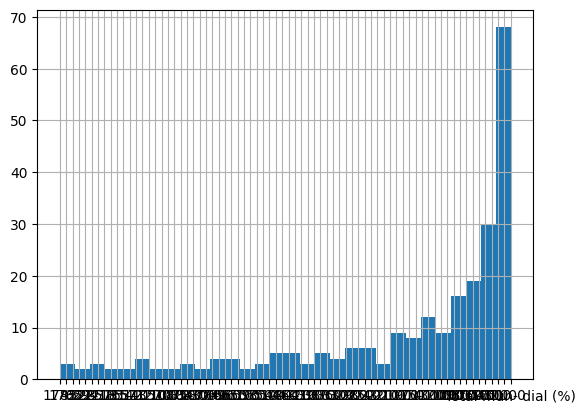

In [ ]:
df['Total mun- dial (%)'].hist(bins=30)


5. df.melt(): Despivota el dataframe convirtiendo columnas en filas.


In [ ]:
melted_df = pd.melt(mode_df, id_vars=["N.º", "ProyecciónPoblación"], var_name="Variable", value_name="Valor")
melted_df

,N.º,ProyecciónPoblación,Variable,Valor
0,1,11 000,Pais,Afganistán
1,10,2 000,Pais,Albania
2,100,NaN,Pais,Alemania
3,101,NaN,Pais,Andorra
4,102,NaN,Pais,Angola
...,...,...,...,...
2455,97,NaN,Enlace o hipervínculo (usualmente de tipo ofic...,NaN
2456,98,NaN,Enlace o hipervínculo (usualmente de tipo ofic...,NaN
2457,99,NaN,Enlace o hipervínculo (usualmente de tipo ofic...,NaN
2458,N°,NaN,Enlace o hipervínculo (usualmente de tipo ofic...,NaN


6.En esta linea se modifica formato de algunos par

In [ ]:
# Limpiar los valores y convertirlos a números
def clean_and_convert(value):
    try:
        cleaned_value = int(value.replace('\xa0', '').replace(',', ''))
        return cleaned_value
    except:
        return 0  # En caso de error, devolvemos 0



7.

In [ ]:
df['Cleaned Population'] = df['Censomasreciente'].apply(clean_and_convert)
global_population = df['Cleaned Population'].sum()
print("Población global:", global_population)


Población global: 15901363531


8.

In [ ]:
df['CleanedCambioAbsolutoPromedio']=df['Cambio absoluto anual promedio'].apply(clean_and_convert)
# Calcular la población global
TotalMundial=df['CleanedCambioAbsolutoPromedio'].sum()
print("CambioAbsolutoPromedio: ", TotalMundial)

CambioAbsolutoPromedio:  176302000


9.

In [ ]:
median_doubling_years = df['Cleaned Population'].median()
median_doubling_years

5220277.5

10.

In [ ]:
df.sample(3) #3 filas aleatorias


,N.º,Pais,ProyecciónPoblación,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,Censomasreciente,UltimaPoblación,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población,Cleaned Population,CleanedCambioAbsolutoPromedio
197,198,Micronesia,106 000,000,024,0,000,286,106 194,1/07/2023,A,stats.pacificdata.org,106194,0
144,145,Botsuana,2 389 000,003,140,34 000,004,50,2 346 179,18/03/2022,P,www.citypopulation.de,2346179,34000
199,200,Tonga,100 000,000,-008,0,000,-,100 179,28/10/2022,C,tongastats.gov.to,100179,0


11. replace(): Reemplazar valores


In [ ]:
dfn=df['Pais'].replace(['India'], 'WOLOLOLOOO')
dfn

0                                            China[12]​
1                                            WOLOLOLOOO
2                                        Estados Unidos
3                                             Indonesia
4                                              Pakistán
                             ...                       
241                             Islas Cocos (Australia)
242    Islas Ultramarinas Menores de los Estados Unidos
243                                 Islas Pitcairn (RU)
244                                               Mundo
245                     País (o territorio dependiente)
Name: Pais, Length: 246, dtype: object

12. :df.rolling(): Calcula métricas móviles en una ventana de filas.

In [ ]:
df['CleanedCambioAbsolutoPromedio'].rolling(5).mean()


0             NaN
1             NaN
2             NaN
3             NaN
4       5515800.0
          ...    
241           0.0
242           0.0
243           0.0
244    17630200.0
245    17630200.0
Name: CleanedCambioAbsolutoPromedio, Length: 246, dtype: float64

13. df.pivot(): Pivota la tabla, convirtiendo filas en columnas. Permite resumir datos agregándolos en una tabla pivotada.


In [ ]:
df.pivot(index='País (o territorio dependiente)', columns='Total mun- dial (%)', values='Cambio absoluto anual promedio')

Total mun- dial (%),000,001,002,003,004,005,006,007,008,009,...,1762,1785,185,218,257,283,294,352,422,Total mun- dial (%)
País (o territorio dependiente),,,,,,,,,,,,,,,,,,,,,
Afganistán,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,-3 000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alemania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2 000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yibuti,NaN,NaN,34 000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
